In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
from sklearn import datasets
dataset_boston = datasets.load_boston()
data = pd.DataFrame(data=dataset_boston['data'], columns=dataset_boston['feature_names'])
data['MEDV'] = dataset_boston['target']

In [3]:
print(dataset_boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


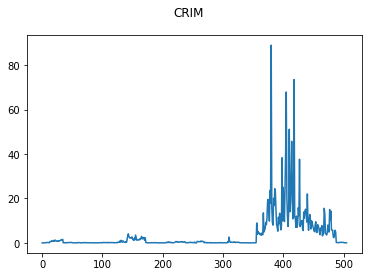

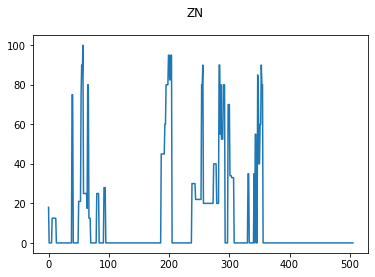

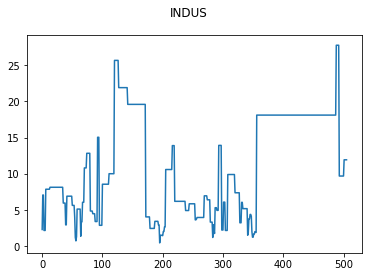

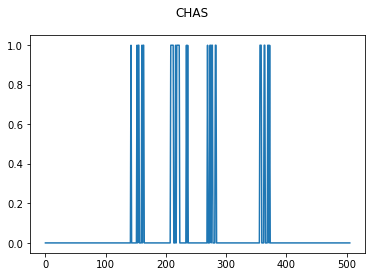

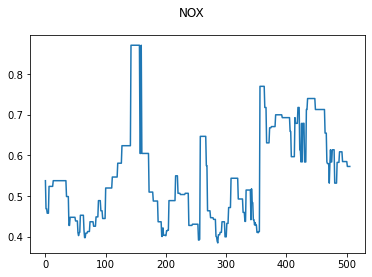

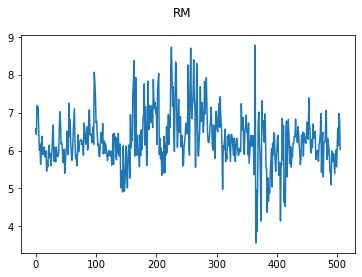

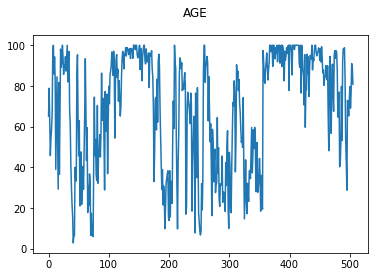

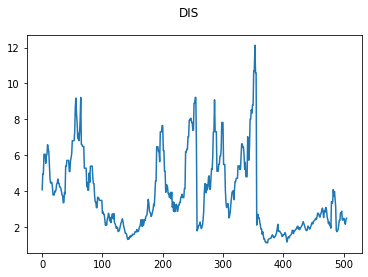

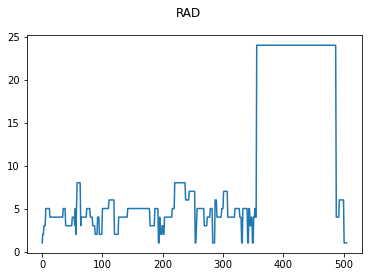

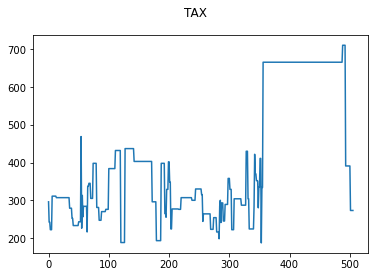

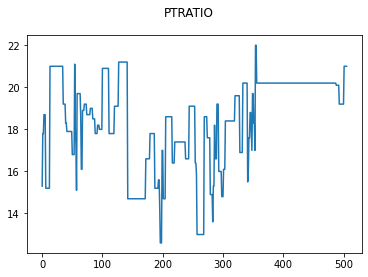

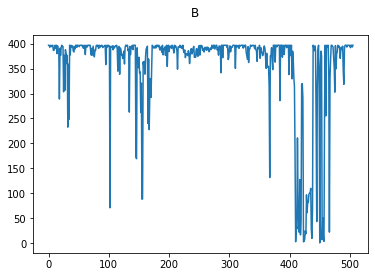

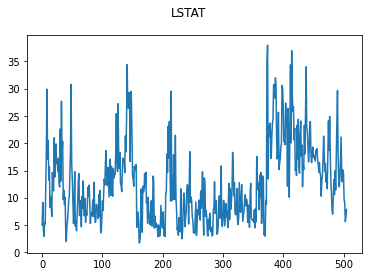

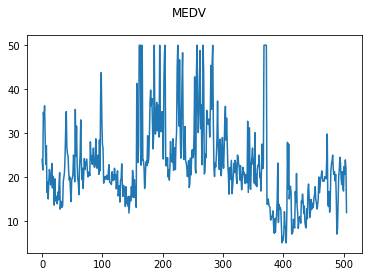

In [7]:
for x in data.columns.values:
    figure = plt.figure()
    plt.plot(data[x])
    figure.suptitle(x)
    plt.show()

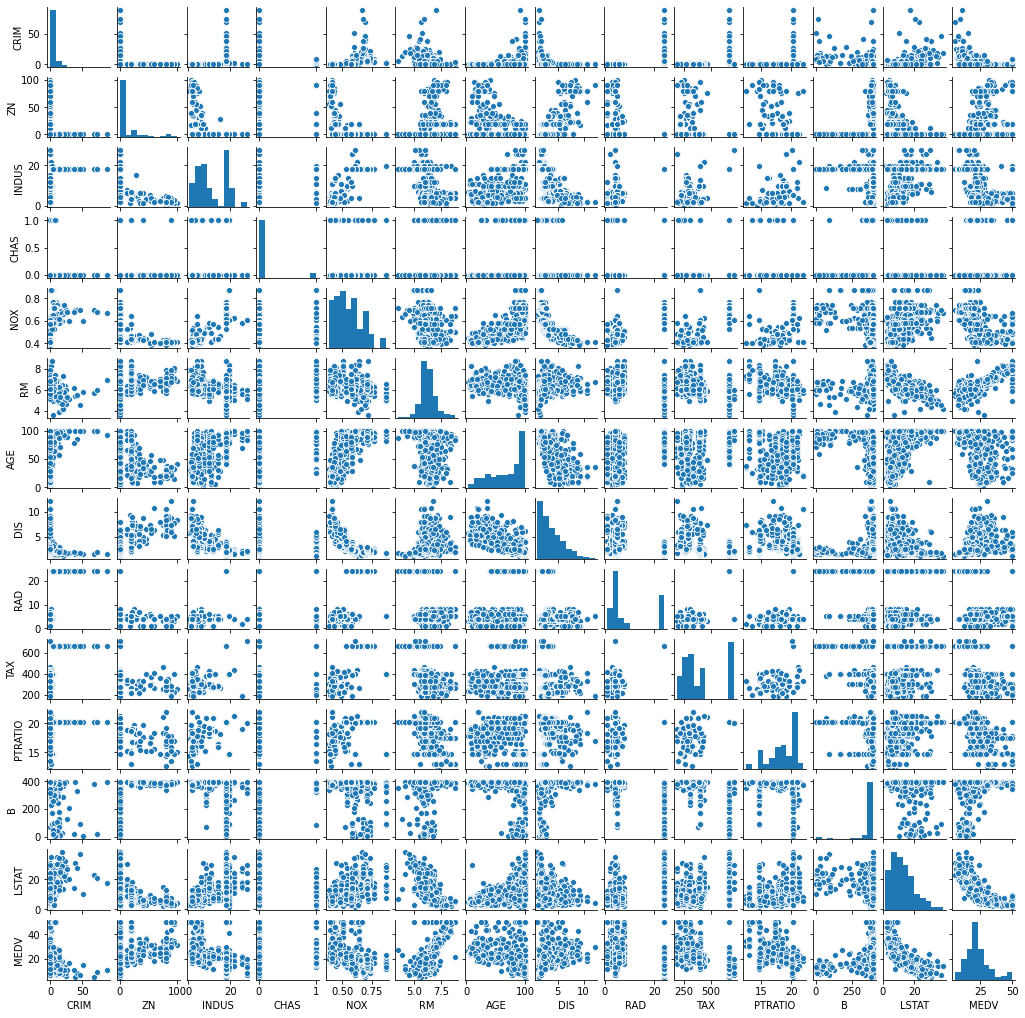

In [8]:
sns.pairplot(data, height=1)

Распределение целевой переменной похоже на нормальное

Цена (MEDV), похоже, прямо пропорциональна числу комнат (RM), а зависимость от процента людей с "низким статусом" (LSTAT) близка к линейной, хотя, скорее, не линейная

Заметны зависимости между не таргетными признаками, проверим:

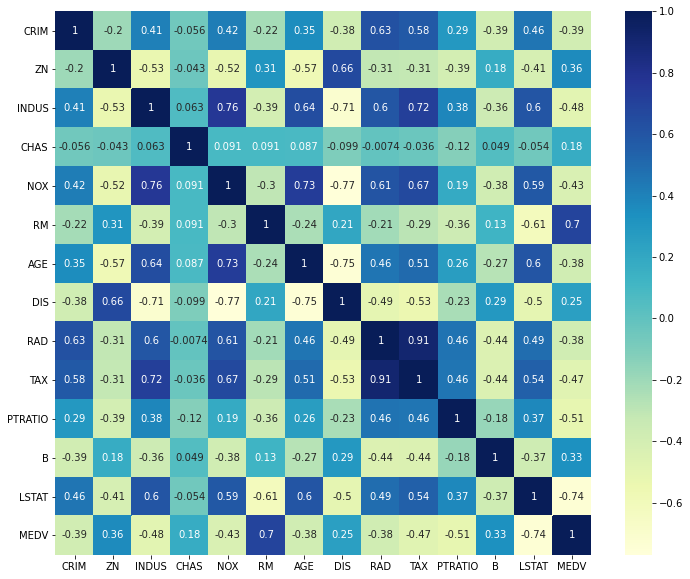

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

Наибольшая корреляция для таргета: MEDV-RM; отрицательная: MEDV-LSTAT

Мультиколлинеарность: INDUS-TAX, NOX-AGE, *RAD-TAX (близко к 1)*; отрицательная: INDUS-DIS, NOX-DIS, AGE-DIS

Попробуем применить простую линейную модель по бросающимся в глаза признакам RM и LSTAT

In [10]:
X = data[['RM', 'LSTAT']]

y = data['MEDV']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6069792285352372

Проверим линеную модель, учитывающую все признаки

In [11]:
X = data.drop(columns='MEDV')

y = data['MEDV']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.673382550640017

Рассмотрим, какие признаки выделит полиномиальный подбор, возможно, появится признак, которым заменим сильно коррелированные RAD и TAX

In [13]:
poly = PolynomialFeatures(3)

X = poly.fit_transform(data.drop(columns=['MEDV']))

y = data['MEDV']

model = LinearRegression().fit(X, y)

weights = dict(zip(model.coef_, poly.get_feature_names()))
weights = sorted(weights.items())
weights[-10:]

[(5212.461641147367, 'x8^2'),
 (10217.060635024312, 'x4^2 x9'),
 (11970.60507064324, 'x9'),
 (19300.511043272203, 'x2 x4 x8'),
 (19404.86935576034, '1'),
 (25324.467017089275, 'x3'),
 (27085.682628006536, 'x0 x4'),
 (33075.67497696103, 'x8 x10'),
 (289676.38903089555, 'x4 x10'),
 (751103.4051039825, 'x4 x8')]

In [16]:
data.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

> NOX x RAD, NOX x PTRATIO, RAD x PTRATIO, CRIM x NOX, CHAS, смещение, INDUS х NOX x RAD, TAX, NOX^2 x TAX

Ни один из вариантов не кажется удачным

Попробуем сократить количество объясняющих признаков не вручную

In [17]:
X = data.drop(columns='MEDV')

y = data['MEDV']

model = LinearRegression()

rfecv = RFECV(model,step=1)
rfecv.fit(X, y)
dict(zip(X.columns.values, rfecv.support_))

{'CRIM': False,
 'ZN': False,
 'INDUS': False,
 'CHAS': True,
 'NOX': True,
 'RM': True,
 'AGE': False,
 'DIS': True,
 'RAD': False,
 'TAX': False,
 'PTRATIO': True,
 'B': False,
 'LSTAT': True}

> CHAS, NOX, RM, DIS, PTRATIO, LSTAT

RAD и TAX нет, RM и LSTAT есть, что кажется неплохим вариантом

In [18]:
X = data[['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]

y = data['MEDV']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6407589788474841

Результат выше, чем у модели по двум признакам и ниже, чем у той, что учла все признаки

Оценим вариант другой модели

In [26]:
X = data.drop(columns='MEDV')
y = data['MEDV']

model = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.681304008805852

Модель по всем признакам дает результаты +- аналогичные линейной, посмотрим, на какик признаки она в первую очередь опиралась

In [27]:
importances = dict(zip(model.feature_importances_, X.columns.values))
importances = sorted(importances.items())
importances

[(3.0409938195832166e-05, 'CHAS'),
 (0.00019484577751769608, 'ZN'),
 (0.0020758170245789194, 'RAD'),
 (0.005134922185866212, 'NOX'),
 (0.007355940812524455, 'TAX'),
 (0.0077714427786409555, 'INDUS'),
 (0.011908550298743851, 'B'),
 (0.01541542139096184, 'AGE'),
 (0.027358133689324014, 'PTRATIO'),
 (0.05887024156360041, 'DIS'),
 (0.08901201789635492, 'CRIM'),
 (0.17485922072312082, 'LSTAT'),
 (0.6000130359205701, 'RM')]

>RM, LSTAT, CRIM, DIS, PTRATIO, AGE, B...

RM и LSTAT самые значимые, что соответствует выводу по графикам, зависимых друг от друга признаков среди наиболее значимых нет, эта последовательность важности признаков приоритетна 

In [29]:
X = data[['RM', 'LSTAT', 'CHAS', 'DIS', 'PTRATIO']]

y = data['MEDV']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6244928830796577

In [30]:
X = data[['RM', 'LSTAT', 'CRIM', 'DIS', 'PTRATIO']]
y = data['MEDV']

model = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6137956372711932

Обе модели по этим признакам довольно слабые, поэтому попробуем третий вариант

In [31]:
X = data.drop(columns='MEDV')
y = data['MEDV']

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.827045975100456

In [32]:
X = data.drop(columns=['MEDV', 'RAD'])
y = data['MEDV']

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8287459162663819

Видим внушительное улучшение, исключение только одного из коррелирующих между собой признаков не повлияло на результат, проверим, что будет выбирать rfecv

In [35]:
X = data.drop(columns='MEDV')
y = data['MEDV']

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

rfecv = RFECV(model,step=1)
rfecv.fit(X_train, y_train)
rfecv.score(X_test, y_test)

dict(zip(X.columns.values, rfecv.support_))

{'CRIM': True,
 'ZN': False,
 'INDUS': False,
 'CHAS': False,
 'NOX': True,
 'RM': True,
 'AGE': True,
 'DIS': True,
 'RAD': False,
 'TAX': True,
 'PTRATIO': True,
 'B': False,
 'LSTAT': True}

> Раз на раз не приходится, но чаще неподходящими считаются RAD, ZN, INDUS, СHAS, что соответствует первичному анализу зависимостей по графикам и тепловой карте и других переборов признаков

Исходя из предыдущих подборов, переберем несколько наиболе вероятных комбинаций и оставим лучшую

In [36]:
X = data[['RM', 'LSTAT', 'CRIM', 'DIS', 'NOX']]
y = data['MEDV']

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8160612512783844

+-0.82 оптимальный результат при 5/13 признаках